In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import mysql.connector

mydb = mysql.connector.connect(
    host="212.227.90.6",
    database="Equip_14",
    user="Equipo14",
    password="E1q2u3i4p5o14"
)

cursor = mydb.cursor()
cursor.execute("SELECT * FROM RRHH") 

resultados = cursor.fetchall()

columnas = [desc[0] for desc in cursor.description]
df_rrhh = pd.DataFrame(resultados, columns=columnas)

df_rrhh 
df_rrhh.info()
df_rrhh.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       740 non-null    int64 
 1   Reason_absence           740 non-null    int64 
 2   Month_absence            740 non-null    int64 
 3   Day_week                 740 non-null    int64 
 4   Seasons                  740 non-null    int64 
 5   Transportation_expense   740 non-null    int64 
 6   Distance_Residence_Work  740 non-null    int64 
 7   Service_time             740 non-null    int64 
 8   Age                      740 non-null    int64 
 9   Work_load_Average_day    740 non-null    object
 10  Hit_target               740 non-null    int64 
 11  Disciplinary_failure     740 non-null    object
 12  Education                740 non-null    object
 13  Son                      740 non-null    object
 14  Social_drinker           740 non-null    o

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,11,11,2,4,155,12,14,34,"284,031",...,0,1,2,1,0,0,95,196,25,120
1,36,13,4,4,3,118,13,18,50,"239,409",...,0,1,1,1,0,0,98,178,31,120
2,9,6,7,3,1,228,14,16,58,"264,604",...,0,1,2,0,0,1,65,172,22,120
3,28,9,7,3,1,225,26,9,28,"230,290",...,0,1,1,0,0,2,69,169,24,112
4,9,12,3,3,2,228,14,16,58,"222,196",...,0,1,2,0,0,1,65,172,22,112


In [4]:
# Revisar si hay Missing Values: no hay
df_rrhh.isnull().sum()

ID                         0
Reason_absence             0
Month_absence              0
Day_week                   0
Seasons                    0
Transportation_expense     0
Distance_Residence_Work    0
Service_time               0
Age                        0
Work_load_Average_day      0
Hit_target                 0
Disciplinary_failure       0
Education                  0
Son                        0
Social_drinker             0
Social_smoker              0
Pet                        0
Weight                     0
Height                     0
Body_mass_index            0
Absenteeism_hours          0
dtype: int64

In [5]:
df_rrhh = df_rrhh.sort_values(by='ID').reset_index(drop=True)
df_rrhh.info()
df_rrhh.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       740 non-null    int64 
 1   Reason_absence           740 non-null    int64 
 2   Month_absence            740 non-null    int64 
 3   Day_week                 740 non-null    int64 
 4   Seasons                  740 non-null    int64 
 5   Transportation_expense   740 non-null    int64 
 6   Distance_Residence_Work  740 non-null    int64 
 7   Service_time             740 non-null    int64 
 8   Age                      740 non-null    int64 
 9   Work_load_Average_day    740 non-null    object
 10  Hit_target               740 non-null    int64 
 11  Disciplinary_failure     740 non-null    object
 12  Education                740 non-null    object
 13  Son                      740 non-null    object
 14  Social_drinker           740 non-null    o

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,1,0,3,5,3,235,11,14,37,"244,387",...,1,3,1,0,0,1,88,172,29,0
1,1,18,11,4,4,235,11,14,37,"284,031",...,0,3,1,0,0,1,88,172,29,1
2,1,25,11,5,4,235,11,14,37,"284,031",...,0,3,1,0,0,1,88,172,29,2
3,1,13,1,3,2,235,11,14,37,"330,061",...,0,3,1,0,0,1,88,172,29,1
4,1,25,12,5,4,235,11,14,37,"236,629",...,0,3,1,0,0,1,88,172,29,2


In [6]:
# Revisar si hay registros duplcados exactos: hay 34
df_rrhh.duplicated().sum()

np.int64(34)

In [7]:
df_rrhh[df_rrhh.duplicated()]

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
53,3,28,12,6,4,179,51,18,38,"236,629",...,0,1,0,1,0,0,89,170,31,1
79,3,27,2,4,2,179,51,18,38,"264,249",...,0,1,0,1,0,0,89,170,31,2
83,3,27,3,4,2,179,51,18,38,"222,196",...,0,1,0,1,0,0,89,170,31,2
90,3,27,2,5,2,179,51,18,38,"264,249",...,0,1,0,1,0,0,89,170,31,2
93,3,27,2,4,2,179,51,18,38,"264,249",...,0,1,0,1,0,0,89,170,31,2
94,3,27,2,6,2,179,51,18,38,"264,249",...,0,1,0,1,0,0,89,170,31,2
95,3,27,2,2,2,179,51,18,38,"264,249",...,0,1,0,1,0,0,89,170,31,2
98,3,27,3,4,2,179,51,18,38,"222,196",...,0,1,0,1,0,0,89,170,31,2
103,3,27,2,4,2,179,51,18,38,"251,818",...,0,1,0,1,0,0,89,170,31,3
107,3,27,2,4,2,179,51,18,38,"251,818",...,0,1,0,1,0,0,89,170,31,3


In [8]:
# Mostrar las filas que son duplicados exactos (excepto la primera aparición)
duplicates = df_rrhh[df_rrhh.duplicated()]
duplicates

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
53,3,28,12,6,4,179,51,18,38,"236,629",...,0,1,0,1,0,0,89,170,31,1
79,3,27,2,4,2,179,51,18,38,"264,249",...,0,1,0,1,0,0,89,170,31,2
83,3,27,3,4,2,179,51,18,38,"222,196",...,0,1,0,1,0,0,89,170,31,2
90,3,27,2,5,2,179,51,18,38,"264,249",...,0,1,0,1,0,0,89,170,31,2
93,3,27,2,4,2,179,51,18,38,"264,249",...,0,1,0,1,0,0,89,170,31,2
94,3,27,2,6,2,179,51,18,38,"264,249",...,0,1,0,1,0,0,89,170,31,2
95,3,27,2,2,2,179,51,18,38,"264,249",...,0,1,0,1,0,0,89,170,31,2
98,3,27,3,4,2,179,51,18,38,"222,196",...,0,1,0,1,0,0,89,170,31,2
103,3,27,2,4,2,179,51,18,38,"251,818",...,0,1,0,1,0,0,89,170,31,3
107,3,27,2,4,2,179,51,18,38,"251,818",...,0,1,0,1,0,0,89,170,31,3


In [9]:
# Guardo una copia de los duplicados exactos con indice
#duplicates.to_csv('exact_duplicates.csv', index=True)

In [10]:
# elimino duplicados
df_rrhh = df_rrhh.drop_duplicates()

In [11]:
df_rrhh.duplicated().sum()

np.int64(0)

In [12]:
# Cambiar tipo de datos de las columnas acordadas
df_rrhh['ID'] = df_rrhh['ID'].astype(str).str.strip()
df_rrhh['Reason_absence'] = df_rrhh['Reason_absence'].astype(str).str.strip()
df_rrhh['Seasons'] = df_rrhh['Seasons'].astype(str).str.strip()
df_rrhh['Social_drinker'] = df_rrhh['Social_drinker'].astype(int)
df_rrhh['Social_smoker'] = df_rrhh['Social_smoker'].astype(int)
df_rrhh['Disciplinary_failure'] = df_rrhh['Disciplinary_failure'].astype(int)
df_rrhh['Son'] = df_rrhh['Son'].astype(int)
df_rrhh['Pet'] = df_rrhh['Pet'].astype(int)

In [13]:
df_rrhh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       706 non-null    object
 1   Reason_absence           706 non-null    object
 2   Month_absence            706 non-null    int64 
 3   Day_week                 706 non-null    int64 
 4   Seasons                  706 non-null    object
 5   Transportation_expense   706 non-null    int64 
 6   Distance_Residence_Work  706 non-null    int64 
 7   Service_time             706 non-null    int64 
 8   Age                      706 non-null    int64 
 9   Work_load_Average_day    706 non-null    object
 10  Hit_target               706 non-null    int64 
 11  Disciplinary_failure     706 non-null    int64 
 12  Education                706 non-null    object
 13  Son                      706 non-null    int64 
 14  Social_drinker           706 non-null    int64 

In [14]:
df_rrhh['Social_drinker'] = df_rrhh['Social_drinker'].astype(bool)
df_rrhh['Social_smoker'] = df_rrhh['Social_smoker'].astype(bool)
df_rrhh['Disciplinary_failure'] = df_rrhh['Disciplinary_failure'].astype(bool)
df_rrhh['Work_load_Average_day'] = df_rrhh['Work_load_Average_day'].astype(str).str.replace(',', '.', regex=False).astype(float)

In [15]:
df_rrhh.info()
df_rrhh.head()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       706 non-null    object 
 1   Reason_absence           706 non-null    object 
 2   Month_absence            706 non-null    int64  
 3   Day_week                 706 non-null    int64  
 4   Seasons                  706 non-null    object 
 5   Transportation_expense   706 non-null    int64  
 6   Distance_Residence_Work  706 non-null    int64  
 7   Service_time             706 non-null    int64  
 8   Age                      706 non-null    int64  
 9   Work_load_Average_day    706 non-null    float64
 10  Hit_target               706 non-null    int64  
 11  Disciplinary_failure     706 non-null    bool   
 12  Education                706 non-null    object 
 13  Son                      706 non-null    int64  
 14  Social_drinker           706 no

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,1,0,3,5,3,235,11,14,37,244.387,...,True,3,1,False,False,1,88,172,29,0
1,1,18,11,4,4,235,11,14,37,284.031,...,False,3,1,False,False,1,88,172,29,1
2,1,25,11,5,4,235,11,14,37,284.031,...,False,3,1,False,False,1,88,172,29,2
3,1,13,1,3,2,235,11,14,37,330.061,...,False,3,1,False,False,1,88,172,29,1
4,1,25,12,5,4,235,11,14,37,236.629,...,False,3,1,False,False,1,88,172,29,2


In [16]:
# Columnas Month_abcense y Day_week:  para series de tiempo
# Verifico que los valores de Month_abcense estén dentro del rango del 1 al 12
df_rrhh['Month_absence'].unique()

array([ 3, 11,  1, 12, 10,  7,  8,  5,  4,  6,  2,  9,  0])

In [17]:
# Verifico que los valores de Day_week estén dentro del rango del 2 al 6
df_rrhh['Day_week'].unique()

array([5, 4, 3, 2, 6])

In [18]:
df_rrhh.describe()

,Month_absence,Day_week,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,Hit_target,Son,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,6.410765,3.890935,222.977337,29.297450,12.495751,36.478754,272.089984,94.548159,1.060907,0.769122,79.005666,172.202550,26.635977,7.143059
std,3.404811,1.425503,67.293426,14.706661,4.370190,6.563404,39.458780,3.803854,1.104717,1.333351,12.862501,6.159814,4.254901,13.608120
min,0.000000,2.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,3.000000,3.000000,179.000000,16.000000,9.000000,31.000000,244.387000,92.250000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,6.000000,4.000000,225.000000,26.000000,13.000000,37.000000,264.604000,95.000000,1.000000,0.000000,80.000000,171.000000,25.000000,3.000000
75%,9.750000,5.000000,260.000000,49.000000,16.000000,40.000000,294.217000,97.000000,2.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,12.000000,6.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,4.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [19]:
# Dataframe libre de duplicados
#df_rrhh.to_csv('cleaned_rrhh.csv', index=True)

In [20]:
# dataframe para analisis ausencias
df_absences = df_rrhh[['ID', 'Reason_absence', 'Month_absence', 'Day_week', 'Seasons', 'Absenteeism_hours','Distance_Residence_Work', 'Age', 'Son', 'Work_load_Average_day', 'Hit_target']]
df_absences = df_absences.sort_values(by='ID')
df_absences.info()
df_absences.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 706 entries, 0 to 184
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       706 non-null    object 
 1   Reason_absence           706 non-null    object 
 2   Month_absence            706 non-null    int64  
 3   Day_week                 706 non-null    int64  
 4   Seasons                  706 non-null    object 
 5   Absenteeism_hours        706 non-null    int64  
 6   Distance_Residence_Work  706 non-null    int64  
 7   Age                      706 non-null    int64  
 8   Son                      706 non-null    int64  
 9   Work_load_Average_day    706 non-null    float64
 10  Hit_target               706 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 66.2+ KB


,Month_absence,Day_week,Absenteeism_hours,Distance_Residence_Work,Age,Son,Work_load_Average_day,Hit_target
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,6.410765,3.890935,7.143059,29.297450,36.478754,1.060907,272.089984,94.548159
std,3.404811,1.425503,13.608120,14.706661,6.563404,1.104717,39.458780,3.803854
min,0.000000,2.000000,0.000000,5.000000,27.000000,0.000000,205.917000,81.000000
25%,3.000000,3.000000,2.000000,16.000000,31.000000,0.000000,244.387000,92.250000
50%,6.000000,4.000000,3.000000,26.000000,37.000000,1.000000,264.604000,95.000000
75%,9.750000,5.000000,8.000000,49.000000,40.000000,2.000000,294.217000,97.000000
max,12.000000,6.000000,120.000000,52.000000,58.000000,4.000000,378.884000,100.000000


In [22]:
category_columns = df_absences.select_dtypes(include=object)
for column in category_columns:
    print(f"Column: {column}")
    print(f"Unique values ({df_absences[column].nunique()}): {df_absences[column].unique()}")
    print("---"*30)

Column: ID
Unique values (36): ['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35' '36'
 '4' '5' '6' '7' '8' '9']
------------------------------------------------------------------------------------------
Column: Reason_absence
Unique values (28): ['0' '13' '22' '21' '23' '26' '1' '7' '14' '18' '25' '11' '19' '8' '10'
 '28' '24' '6' '12' '3' '16' '17' '2' '15' '27' '9' '4' '5']
------------------------------------------------------------------------------------------
Column: Seasons
Unique values (4): ['3' '1' '2' '4']
------------------------------------------------------------------------------------------


In [23]:
df_absences.loc[
    df_absences['Seasons'] == '1', 'Season_name'] = 'summer'
df_absences.loc[
    df_absences['Seasons'] == '2', 'Season_name'] = 'autumn'
df_absences.loc[
    df_absences['Seasons'] == '3', 'Season_name'] = 'winter'
df_absences.loc[
    df_absences['Seasons'] == '4', 'Season_name'] = 'spring'

In [24]:
df_absences.loc[
    df_absences['Month_absence'] == 1, 'Month_name'] = 'Jan'
df_absences.loc[
    df_absences['Month_absence'] == 2, 'Month_name'] = 'Feb'
df_absences.loc[
    df_absences['Month_absence'] == 3, 'Month_name'] = 'Mar'
df_absences.loc[
    df_absences['Month_absence'] == 4, 'Month_name'] = 'Apr'
df_absences.loc[
    df_absences['Month_absence'] == 5, 'Month_name'] = 'May'
df_absences.loc[
    df_absences['Month_absence'] == 6, 'Month_name'] = 'Jun'
df_absences.loc[
    df_absences['Month_absence'] == 7, 'Month_name'] = 'Jul'
df_absences.loc[
    df_absences['Month_absence'] == 8, 'Month_name'] = 'Aug'
df_absences.loc[
    df_absences['Month_absence'] == 9, 'Month_name'] = 'Sep'
df_absences.loc[
    df_absences['Month_absence'] == 10, 'Month_name'] = 'Oct'
df_absences.loc[
    df_absences['Month_absence'] == 11, 'Month_name'] = 'Nov'
df_absences.loc[
    df_absences['Month_absence'] == 12, 'Month_name'] = 'Dec'


In [25]:
df_absences.loc[
    df_absences['Day_week'] == 2 , 'Day_name'] = 'Mon'
df_absences.loc[
    df_absences['Day_week'] == 3 , 'Day_name'] = 'Tues'
df_absences.loc[
    df_absences['Day_week'] == 4 , 'Day_name'] = 'Wed'
df_absences.loc[
    df_absences['Day_week'] == 5 , 'Day_name'] = 'Thurs'
df_absences.loc[
    df_absences['Day_week'] == 6 , 'Day_name'] = 'Fri'

In [26]:
df_absences.columns

Index(['ID', 'Reason_absence', 'Month_absence', 'Day_week', 'Seasons',
       'Absenteeism_hours', 'Distance_Residence_Work', 'Age', 'Son',
       'Work_load_Average_day', 'Hit_target', 'Season_name', 'Month_name',
       'Day_name'],
      dtype='object')

In [27]:
df_absences

,ID,Reason_absence,Month_absence,Day_week,Seasons,Absenteeism_hours,Distance_Residence_Work,Age,Son,Work_load_Average_day,Hit_target,Season_name,Month_name,Day_name
0,1,0,3,5,3,0,11,37,1,244.387,98,winter,Mar,Thurs
22,1,13,6,6,3,16,11,37,1,377.550,94,winter,Jun,Fri
21,1,22,7,2,1,8,11,37,1,239.554,97,summer,Jul,Mon
19,1,21,3,5,2,8,11,37,1,244.387,98,autumn,Mar,Thurs
18,1,13,6,3,1,8,11,37,1,253.957,95,summer,Jun,Tues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,9,25,3,3,2,3,14,58,2,222.196,99,autumn,Mar,Tues
182,9,1,10,4,4,1,14,58,2,284.853,91,spring,Oct,Wed
183,9,6,7,3,1,120,14,58,2,264.604,93,summer,Jul,Tues
185,9,18,5,4,3,8,14,58,2,246.074,99,winter,May,Wed


In [28]:
# Busco registros donde Month_absence = 0 . Hay 3. Estos registros también tienen Reason_absence = '0' y Absenteeism_hours = 0
df_absences[df_absences['Month_absence'] == 0]

,ID,Reason_absence,Month_absence,Day_week,Seasons,Absenteeism_hours,Distance_Residence_Work,Age,Son,Work_load_Average_day,Hit_target,Season_name,Month_name,Day_name
705,35,0,0,6,3,0,45,53,1,271.219,95,winter,NaN,Fri
142,4,0,0,3,1,0,14,40,1,271.219,95,summer,NaN,Tues
177,8,0,0,4,2,0,35,39,2,271.219,95,autumn,NaN,Wed


In [29]:
# Busco registros donde Month_absence = 0: hay 43. Tienen también Absenteeism_hours = 0
df_absences[df_absences['Month_absence'] == 0]

,ID,Reason_absence,Month_absence,Day_week,Seasons,Absenteeism_hours,Distance_Residence_Work,Age,Son,Work_load_Average_day,Hit_target,Season_name,Month_name,Day_name
705,35,0,0,6,3,0,45,53,1,271.219,95,winter,NaN,Fri
142,4,0,0,3,1,0,14,40,1,271.219,95,summer,NaN,Tues
177,8,0,0,4,2,0,35,39,2,271.219,95,autumn,NaN,Wed


In [30]:
# Ordeno dataframe df_absences por ID, Month_absence y Seasons, para comprender por qué puede haber Month_absence = 0
df_absences.sort_values(by=['ID', 'Month_absence', 'Seasons']).reset_index(drop=True)

,ID,Reason_absence,Month_absence,Day_week,Seasons,Absenteeism_hours,Distance_Residence_Work,Age,Son,Work_load_Average_day,Hit_target,Season_name,Month_name,Day_name
0,1,13,1,3,2,1,11,37,1,330.061,100,autumn,Jan,Tues
1,1,21,3,5,2,8,11,37,1,244.387,98,autumn,Mar,Thurs
2,1,22,3,2,2,8,11,37,1,244.387,98,autumn,Mar,Mon
3,1,0,3,5,3,0,11,37,1,244.387,98,winter,Mar,Thurs
4,1,7,4,6,3,3,11,37,1,326.452,96,winter,Apr,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,9,18,5,4,3,8,14,58,2,246.074,99,winter,May,Wed
702,9,6,7,2,1,8,14,58,2,264.604,93,summer,Jul,Mon
703,9,6,7,3,1,120,14,58,2,264.604,93,summer,Jul,Tues
704,9,18,8,3,1,8,14,58,2,265.615,94,summer,Aug,Tues


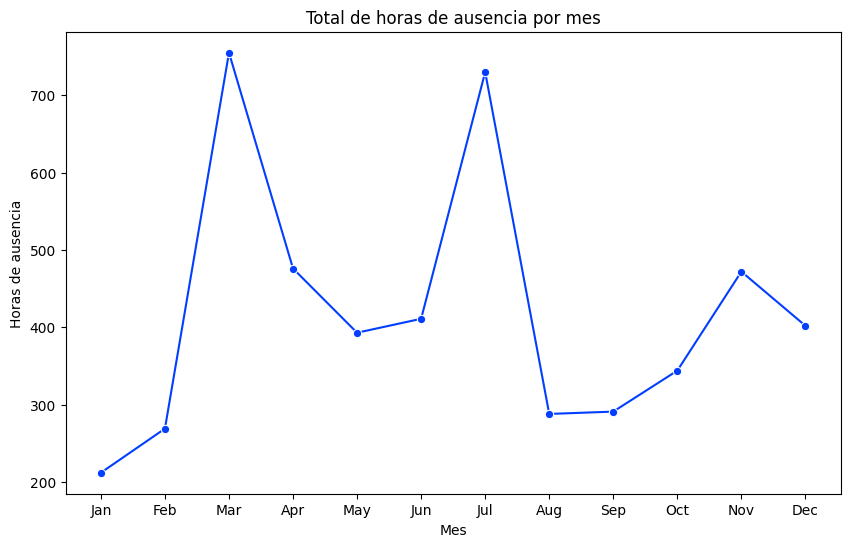

In [31]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Columna Month_name a categórica ordenada
df_absences['Month_name'] = pd.Categorical(df_absences['Month_name'], categories=month_order, ordered=True)

sns.set_palette("bright") 
plt.figure(figsize=(10,6))
sns.lineplot(x='Month_name', y='Absenteeism_hours', data=df_absences, estimator='sum', errorbar=None, marker='o')
plt.title('Total de horas de ausencia por mes')
plt.xlabel('Mes')
plt.ylabel('Horas de ausencia')
plt.show()

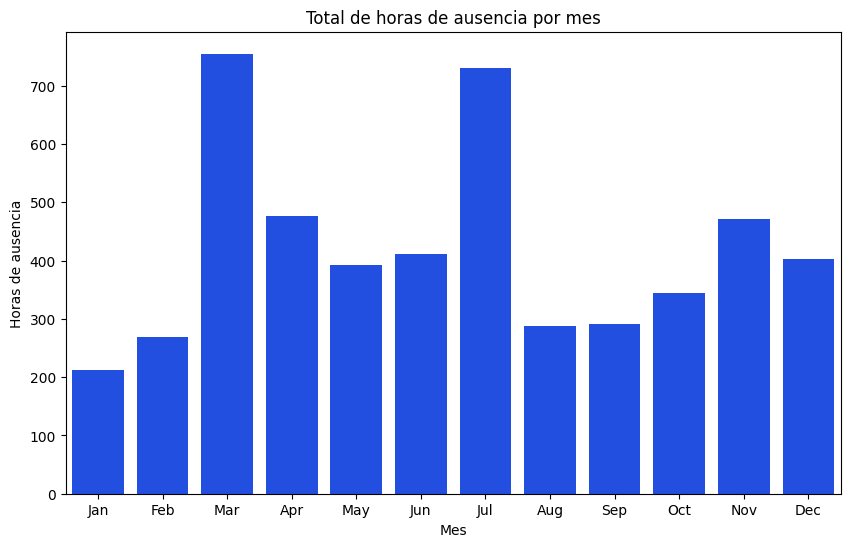

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='Month_name', y='Absenteeism_hours', data=df_absences, estimator='sum',errorbar=None)
plt.title('Total de horas de ausencia por mes')
plt.xlabel('Mes')
plt.ylabel('Horas de ausencia')
plt.show()

In [33]:
print(df_absences['ID'].nunique())
df_absences['ID'].unique()

36


array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '4', '5', '6', '7',
       '8', '9'], dtype=object)

In [34]:
# Trabajadores activos por mes
active_workers_month = df_absences.groupby('Month_name', observed=True)['ID'].nunique()
active_workers_month

Month_name
Jan    13
Feb    19
Mar    22
Apr    21
May    24
Jun    19
Jul    23
Aug    21
Sep    18
Oct    19
Nov    19
Dec    17
Name: ID, dtype: int64

In [35]:
# Total de horas de ausencia por mes
absenteeism_hours_month = df_absences.groupby('Month_name', observed=True)['Absenteeism_hours'].sum()
absenteeism_hours_month

Month_name
Jan    212
Feb    269
Mar    755
Apr    476
May    393
Jun    411
Jul    730
Aug    288
Sep    291
Oct    344
Nov    472
Dec    402
Name: Absenteeism_hours, dtype: int64

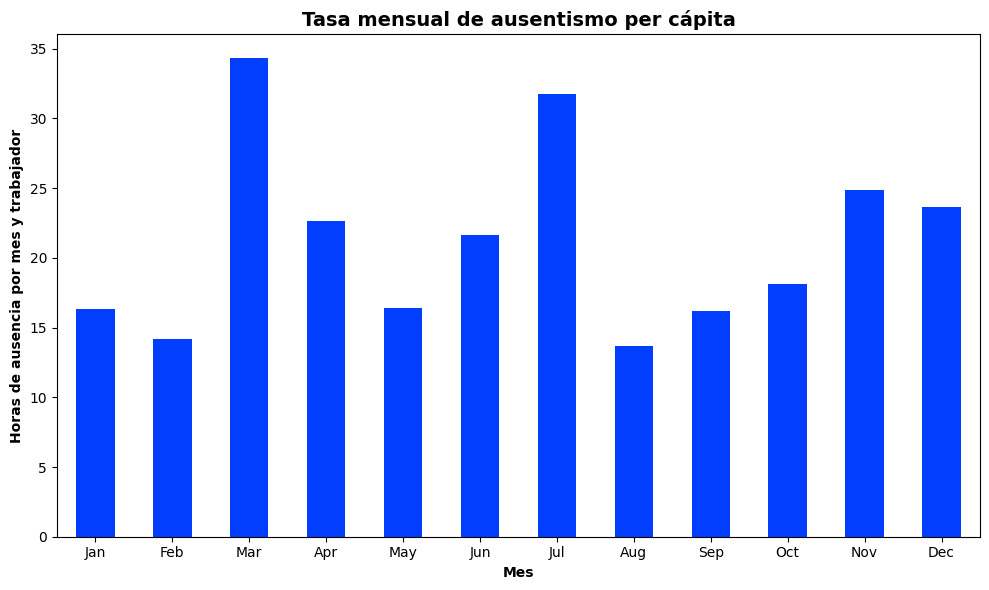

In [36]:
absenteeism_rate_capita = absenteeism_hours_month / active_workers_month

plt.figure(figsize=(10,6))
absenteeism_rate_capita.plot.bar()
plt.title('Tasa mensual de ausentismo per cápita', fontsize=14, fontweight='bold')
plt.xlabel('Mes', fontweight='bold')
plt.ylabel('Horas de ausencia por mes y trabajador', fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [37]:
# Nuevo dataframe donde excluyo los registros con Reason_absence = '0'
absenteeism_reasons = df_absences[df_absences['Reason_absence'] != '0'].copy()
absenteeism_reasons_ordered = absenteeism_reasons.groupby('Reason_absence')['Absenteeism_hours'].sum().sort_values()
absenteeism_reasons_ordered


Reason_absence
16      6
17      8
3       8
4       9
15     16
5      19
24     24
2      24
8      32
21     35
27    106
25    108
7     150
14    167
9     168
6     171
1     182
12    187
18    217
26    240
10    276
22    285
11    297
28    329
23    408
19    729
13    842
Name: Absenteeism_hours, dtype: int64

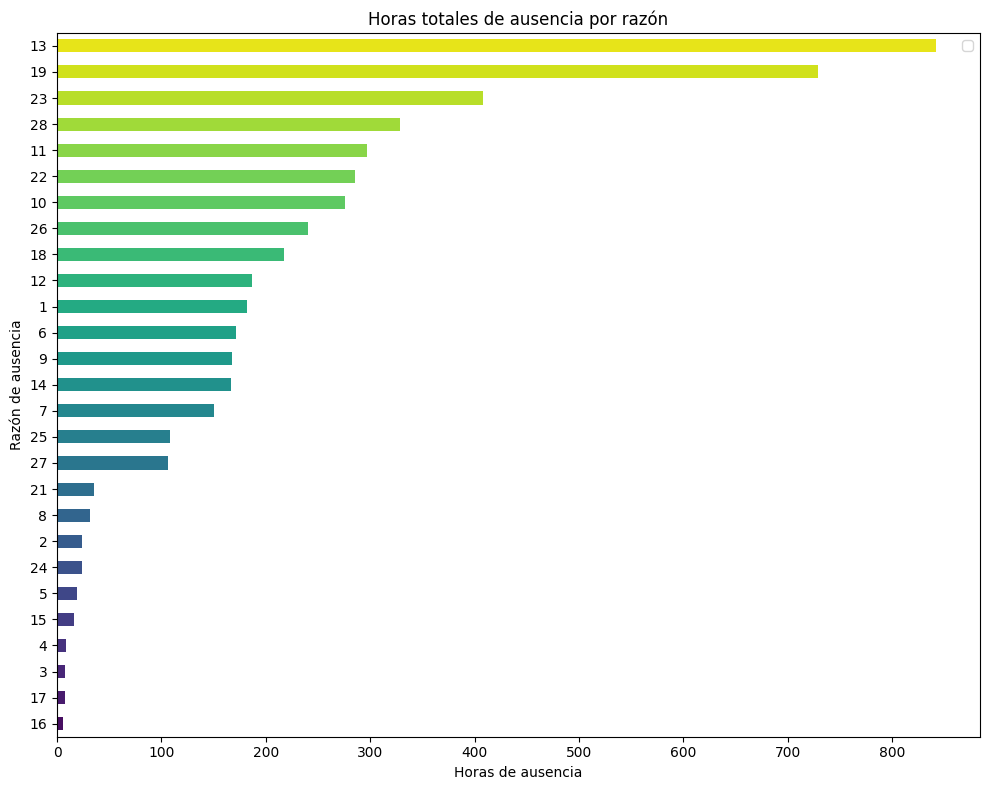

In [38]:
# Gráfico de barras horizontales de las razones de absentismo
colors = sns.color_palette('viridis', n_colors=27)

plt.figure(figsize=(10,8))
absenteeism_reasons_ordered.plot.barh(color=colors)

plt.title('Horas totales de ausencia por razón')
plt.xlabel('Horas de ausencia')
plt.ylabel('Razón de ausencia')
plt.legend('')
plt.tight_layout()
plt.show()

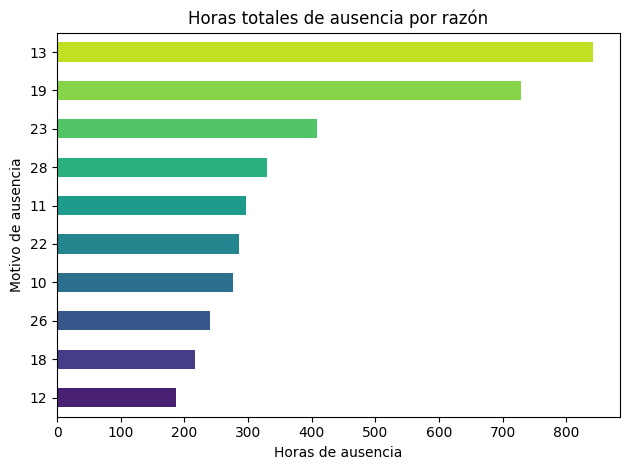

In [39]:
# Top 10 de las Razones de Ausentismo
Top10_reasons = absenteeism_reasons_ordered.tail(10)

colors = sns.color_palette('viridis', n_colors=10)
Top10_reasons.plot.barh(color=colors)

plt.title('Horas totales de ausencia por razón')
plt.xlabel('Horas de ausencia')
plt.ylabel('Motivo de ausencia')
plt.tight_layout()
plt.show()

#

In [40]:
Top10_reasons

Reason_absence
12    187
18    217
26    240
10    276
22    285
11    297
28    329
23    408
19    729
13    842
Name: Absenteeism_hours, dtype: int64

Day_name
Mon      1483
Tues     1221
Wed      1081
Fri       719
Thurs     539
Name: Absenteeism_hours, dtype: int64


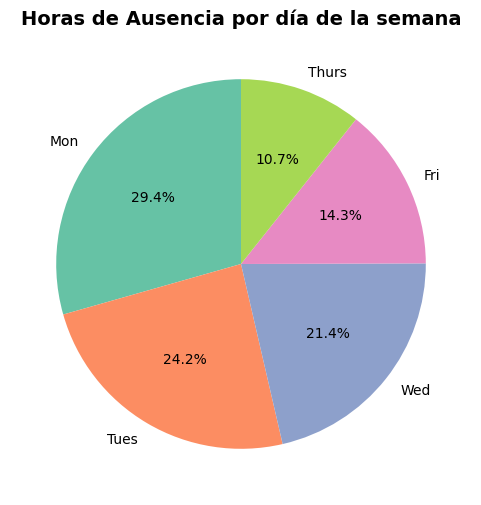

In [41]:
# En qué día de la semana falta más el personal: el Lunes
absences_by_day = df_absences.groupby('Day_name')['Absenteeism_hours'].sum().sort_values(ascending=False)
print(absences_by_day)

colors = sns.color_palette('Set2')
absences_by_day.plot.pie(
    autopct='%1.1f%%',
    colors=colors,  # OJO:  tengo que usar 'colors' en plural para matplotlib
    figsize=(6, 6),
    startangle=90
)
plt.title('Horas de Ausencia por día de la semana', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.show()

Day_name
Mon      1483
Tues     1221
Wed      1081
Fri       719
Thurs     539
Name: Absenteeism_hours, dtype: int64


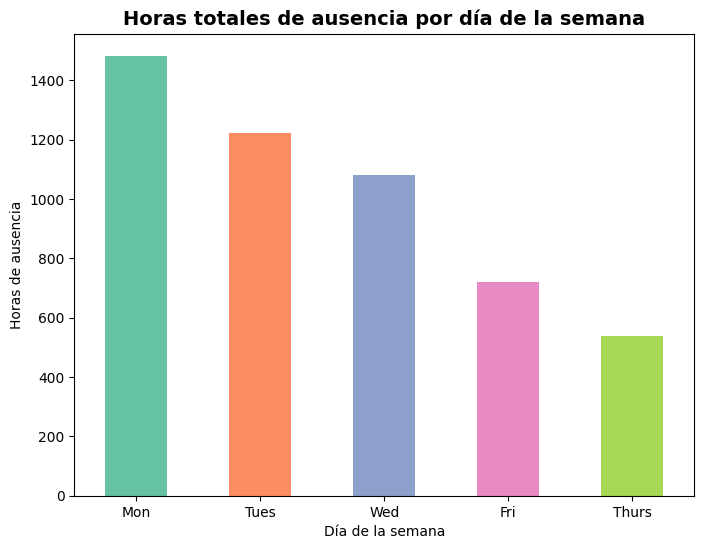

In [42]:
# En qué día de la semana falta más el personal: el Lunes
absences_by_day = df_absences.groupby('Day_name')['Absenteeism_hours'].sum().sort_values(ascending=False)
print(absences_by_day)

colors = sns.color_palette('Set2', n_colors=5)

# Gráfico de barras
plt.figure(figsize=(8,6))
absences_by_day.plot.bar(color=colors)
plt.title('Horas totales de ausencia por día de la semana', fontsize=14, fontweight='bold')
plt.xlabel('Día de la semana')
plt.ylabel('Horas de ausencia')
plt.xticks(rotation=0)
plt.show()

Season_name
winter    1479
summer    1236
spring    1221
autumn    1107
Name: Absenteeism_hours, dtype: int64


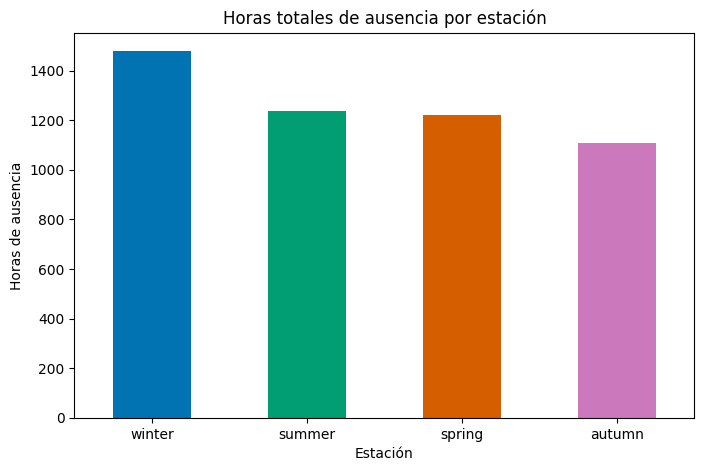

In [43]:
# Faltas por estación
absences_by_season = df_absences.groupby('Season_name')['Absenteeism_hours'].sum().sort_values(ascending=False)
print(absences_by_season)

# Gráfico de barras

colors = sns.color_palette('colorblind6')
plt.figure(figsize=(8,5))
absences_by_season.plot.bar(color=colors)
plt.title('Horas totales de ausencia por estación')
plt.xlabel('Estación')
plt.ylabel('Horas de ausencia')
plt.xticks(rotation=0)
plt.show()

In [44]:
df_absences.select_dtypes(include="number")

,Month_absence,Day_week,Absenteeism_hours,Distance_Residence_Work,Age,Son,Work_load_Average_day,Hit_target
0,3,5,0,11,37,1,244.387,98
22,6,6,16,11,37,1,377.550,94
21,7,2,8,11,37,1,239.554,97
19,3,5,8,11,37,1,244.387,98
18,6,3,8,11,37,1,253.957,95
...,...,...,...,...,...,...,...,...
181,3,3,3,14,58,2,222.196,99
182,10,4,1,14,58,2,284.853,91
183,7,3,120,14,58,2,264.604,93
185,5,4,8,14,58,2,246.074,99


In [45]:
round(df_absences[['Absenteeism_hours', 'Distance_Residence_Work', 'Age', 'Son']].corr(),3)

,Absenteeism_hours,Distance_Residence_Work,Age,Son
Absenteeism_hours,1.000,-0.085,0.066,0.102
Distance_Residence_Work,-0.085,1.000,-0.156,0.078
Age,0.066,-0.156,1.000,0.057
Son,0.102,0.078,0.057,1.000


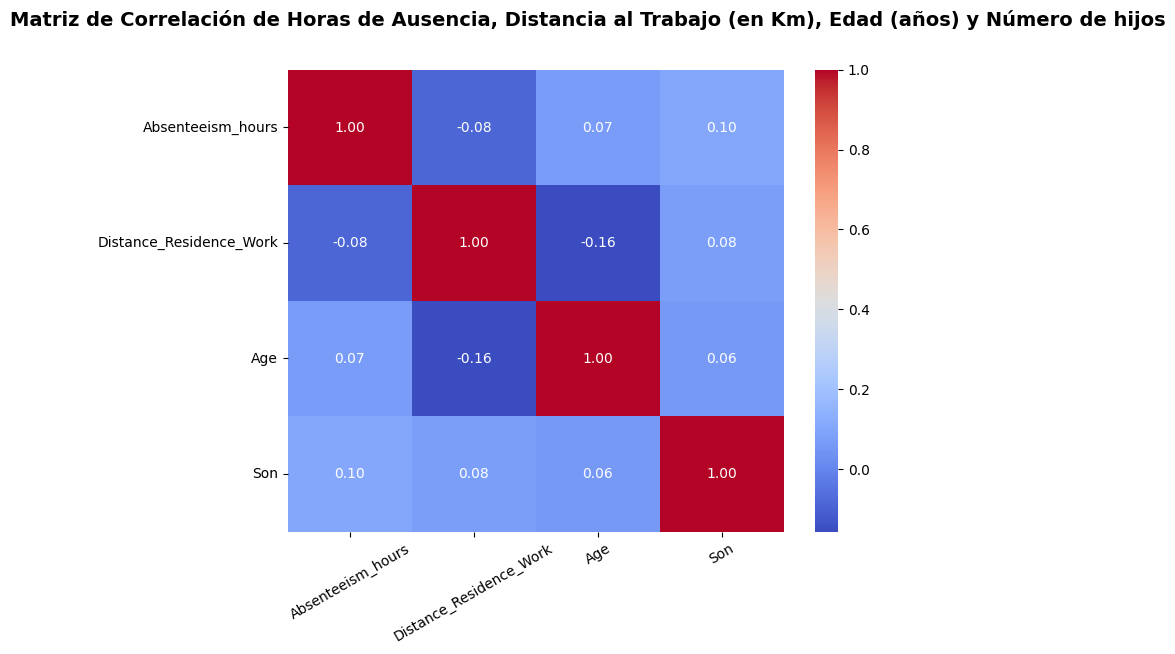

In [46]:
# Calcular la matriz de correlacion
corr_matrix = df_absences[['Absenteeism_hours', 'Distance_Residence_Work', 'Age', 'Son']].corr()

# Crear el mapa de calor
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.suptitle("Matriz de Correlación de Horas de Ausencia, Distancia al Trabajo (en Km), Edad (años) y Número de hijos", fontsize=14, fontweight='bold')
plt.xticks(rotation=30)
plt.show()

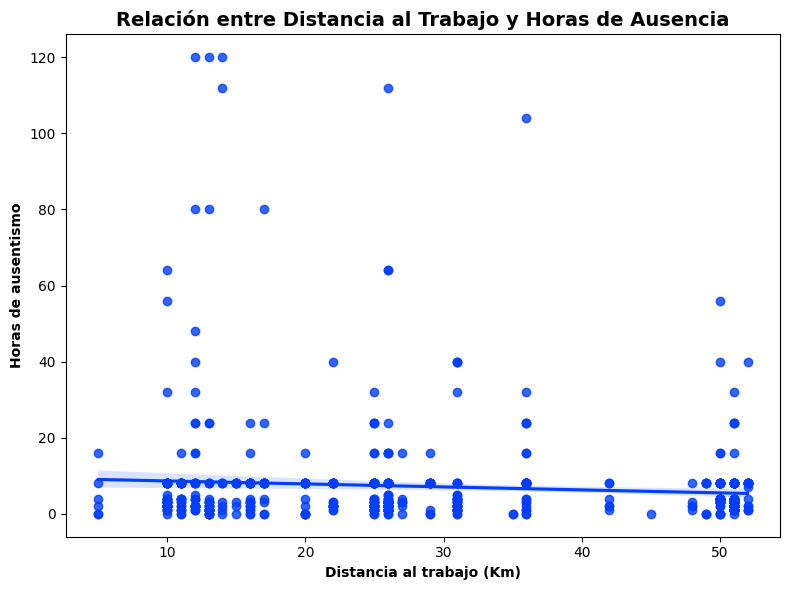

In [47]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df_absences,
    x='Distance_Residence_Work',
    y='Absenteeism_hours',
    #alpha=0.6
)
plt.title('Relación entre Distancia al Trabajo y Horas de Ausencia', fontsize=14, fontweight='bold')
plt.xlabel('Distancia al trabajo (Km)', fontweight= 'bold')
plt.ylabel('Horas de ausentismo', fontweight='bold')
plt.tight_layout()
plt.show()

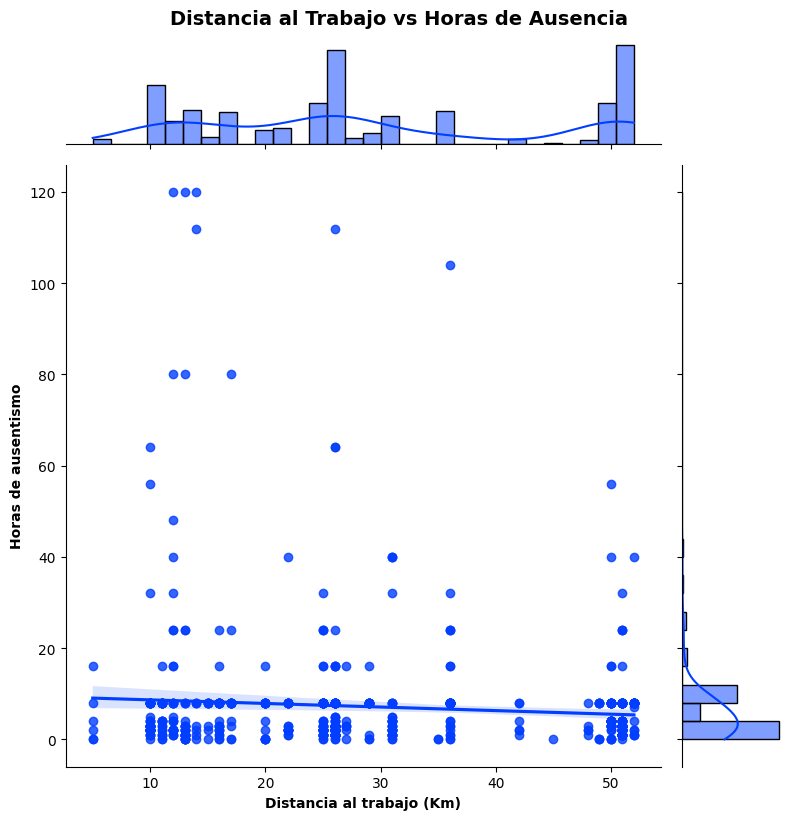

In [48]:
sns.jointplot(
    data=df_absences,
    x='Distance_Residence_Work',
    y='Absenteeism_hours',
    kind='reg',  # Puedes usar 'scatter', 'hex', o 'reg'
    height=8,
    marginal_kws={'bins': 30, 'fill': True}
)
plt.suptitle('Distancia al Trabajo vs Horas de Ausencia', y=1.02, fontsize=14, fontweight='bold')
plt.xlabel('Distancia al trabajo (Km)', fontweight= 'bold')
plt.ylabel('Horas de ausentismo', fontweight='bold')
plt.show()

In [49]:
df_absences['distance_bins'] = pd.cut(df_absences['Distance_Residence_Work'], bins=[0,10,20,30,40,50,100], labels=['0-10Km', '10-20Km', '20-30Km', '30-40Km', '40-50Km','más de 50Km'])

absenteeism_distance = df_absences.groupby('distance_bins', observed=True)['Absenteeism_hours'].sum()
absenteeism_distance

distance_bins
0-10Km          363
10-20Km        1684
20-30Km        1246
30-40Km         701
40-50Km         393
más de 50Km     656
Name: Absenteeism_hours, dtype: int64

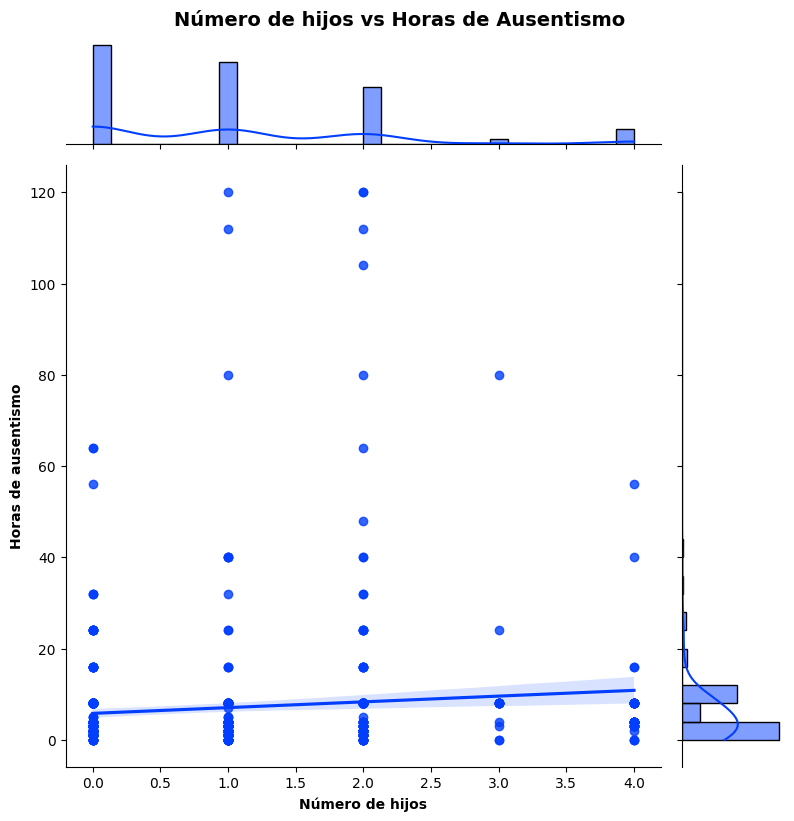

In [50]:
sns.jointplot(
    data=df_absences,
    x='Son',
    y='Absenteeism_hours',
    kind='reg',  # Puedes usar 'scatter', 'hex', o 'reg'
    height=8,
    marginal_kws={'bins': 30, 'fill': True}
)
plt.suptitle('Número de hijos vs Horas de Ausentismo', y=1.02, fontsize=14, fontweight='bold')
plt.xlabel('Número de hijos', fontweight= 'bold')
plt.ylabel('Horas de ausentismo', fontweight='bold')
plt.show()

In [51]:
absenteeism_children = df_absences.groupby('Son', observed=True)['Absenteeism_hours'].sum()
absenteeism_children

Son
0    1540
1    1365
2    1649
3     183
4     306
Name: Absenteeism_hours, dtype: int64

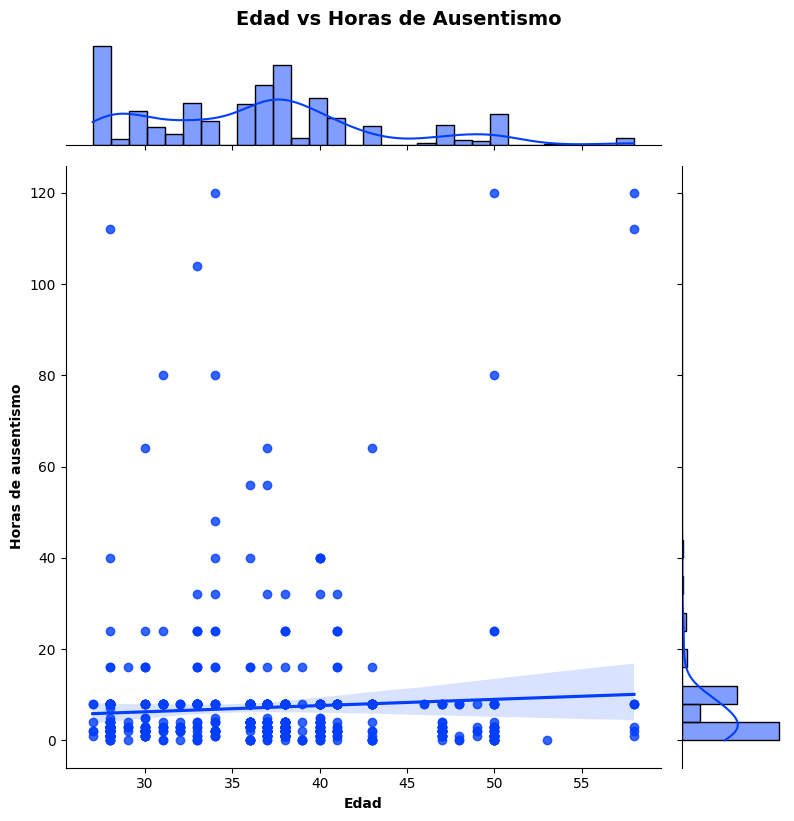

In [52]:
sns.jointplot(
    data=df_absences,
    x='Age',
    y='Absenteeism_hours',
    kind='reg',  # Puedes usar 'scatter', 'hex', o 'reg'
    height=8,
    marginal_kws={'bins': 30, 'fill': True}
)
plt.suptitle('Edad vs Horas de Ausentismo', y=1.02, fontsize=14, fontweight='bold')
plt.xlabel('Edad', fontweight= 'bold')
plt.ylabel('Horas de ausentismo', fontweight= 'bold')
plt.show()

In [53]:
absenteeism_age = df_absences.groupby('Age', observed=True)['Absenteeism_hours'].sum()
absenteeism_age

Age
27     25
28    639
29     31
30    242
31    217
32     48
33    538
34    476
36    346
37    454
38    444
39     30
40    377
41    272
43    185
46     16
47     73
48     25
49     16
50    327
53      0
58    262
Name: Absenteeism_hours, dtype: int64